Refrence - Nipun Batra Sir - https://nipunbatra.github.io/ml-teaching/notebooks/movie-recommendation-knn-mf.html


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
# Now working with real data

# Load the data

df = pd.read_excel("/content/drive/MyDrive/Movie-Recommendation-2024-Fall.xlsx")
df.head(10)

,Timestamp,Your name,Sholay,Swades (We The People),The Matrix (I),Interstellar,Dangal,Taare Zameen Par,Shawshank Redemption,The Dark Knight,Notting Hill,Uri: The Surgical Strike
0,2024-09-09 18:12:41.227,P.Sai Keerthana,3.0,5.0,5.0,4.0,5.0,5.0,3.0,3.0,4.0,5.0
1,2024-09-09 18:12:47.984,Pradeep,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,5.0
2,2024-09-09 18:12:54.979,Uday Sankar Gottipalli,3.0,NaN,5.0,5.0,5.0,NaN,NaN,NaN,NaN,4.0
3,2024-09-09 18:12:58.795,Aashmun Gupta,4.0,5.0,4.0,5.0,3.0,5.0,1.0,3.0,4.0,4.0
4,2024-09-09 18:13:01.629,Siddharth Mohanty,4.0,3.0,5.0,5.0,5.0,5.0,3.0,5.0,2.0,4.0
5,2024-09-09 18:13:17.288,Ayush Shrivastava,4.0,4.0,5.0,5.0,3.0,4.0,NaN,NaN,NaN,4.0
6,2024-09-09 18:15:18.092,Abhay Pisharodi,3.0,NaN,NaN,3.0,4.0,4.0,NaN,4.0,NaN,5.0
7,2024-09-09 18:16:12.892,Shreya Mali,NaN,NaN,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN
8,2024-09-09 18:17:39.678,Shounak Ranade,3.0,NaN,5.0,5.0,4.0,5.0,5.0,3.0,NaN,4.0
9,2024-09-09 18:17:58.374,Prathamesh P. Shanbhag,3.0,4.0,5.0,4.0,4.0,4.0,NaN,NaN,NaN,5.0


In [ ]:
# Discard the timestamp column

df = df.drop('Timestamp', axis=1)

# Make the "Your Name" column the index

df = df.set_index('Your name')
df

,Sholay,Swades (We The People),The Matrix (I),Interstellar,Dangal,Taare Zameen Par,Shawshank Redemption,The Dark Knight,Notting Hill,Uri: The Surgical Strike
Your name,,,,,,,,,,
P.Sai Keerthana,3.0,5.0,5.0,4.0,5.0,5.0,3.0,3.0,4.0,5.0
Pradeep,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,5.0
Uday Sankar Gottipalli,3.0,NaN,5.0,5.0,5.0,NaN,NaN,NaN,NaN,4.0
Aashmun Gupta,4.0,5.0,4.0,5.0,3.0,5.0,1.0,3.0,4.0,4.0
Siddharth Mohanty,4.0,3.0,5.0,5.0,5.0,5.0,3.0,5.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...
Vadithe Venkat Akhilesh Naik,4.0,3.0,4.0,4.0,5.0,5.0,3.0,5.0,3.0,5.0
Rudra,3.0,NaN,5.0,5.0,3.0,4.0,5.0,5.0,3.0,1.0
Mukesh,3.0,4.0,5.0,5.0,3.0,3.0,5.0,5.0,4.0,4.0


In [ ]:
df.index

Index(['P.Sai Keerthana ', 'Pradeep ', 'Uday Sankar Gottipalli',
       'Aashmun Gupta', 'Siddharth Mohanty', 'Ayush Shrivastava',
       'Abhay Pisharodi', 'Shreya Mali', 'Shounak Ranade',
       'Prathamesh P. Shanbhag', 'Suruchi Hardaha', 'Balkrishna Sehra',
       'Het Shukla', 'N. Eshwar karthikeya ', 'Dhruv Patel',
       'Shreyas Dharmatti ', 'Mohit', 'Praveen Rathod ', 'Dinesh', 'Rahul',
       'Devansh Lodha', 'Abhinav ', 'Tejas Lohia', 'Laksh Jain ',
       'Burra Saharsh', 'Vanshri', 'Karan Gandhi', 'Romit Mohane ',
       'Vedant Acharya', 'Abhiroop Chintalapudi', 'Yash sahu', 'Dinesh',
       'Manish Prasad', 'Parthiv', 'Shivansh Soni',
       'Chepuri Venkata Naga Thrisha', 'Abhinav Kumar', 'Anurag',
       'Bhavya Parmar ', 'Soham Shrivastava ', 'Aditya Borate', 'Hemant ',
       'Abhinav Singh Yadav ', 'Arul Singh', 'Harinarayan J ',
       'uday kumar jarapala', 'Sailesh Panda', 'Yash Sonone ', 'Sayak Dutta',
       'Biswajit Rakshit', 'Praanshu ', 'Samarth Sonawane ',

In [ ]:
# Get index for user and movie
user = 'Ayush Shrivastava'

print(user in df.index)

# Get the movie ratings for user
user_ratings = df.loc[user]
user_ratings

True


,Ayush Shrivastava
Sholay,4.0
Swades (We The People),4.0
The Matrix (I),5.0
Interstellar,5.0
Dangal,3.0
Taare Zameen Par,4.0
Shawshank Redemption,NaN
The Dark Knight,NaN
Notting Hill,NaN
Uri: The Surgical Strike,4.0


In [ ]:
# Number of missing values
df.isnull().sum()

,0
Sholay,20
Swades (We The People),35
The Matrix (I),6
Interstellar,14
Dangal,4
Taare Zameen Par,8
Shawshank Redemption,35
The Dark Knight,25
Notting Hill,45
Uri: The Surgical Strike,12


In [ ]:
# Generic Matrix Factorization (without missing values)

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

n_users, n_movies = 20, 10

# A is a matrix of size (n_users, n_movies) randomly generated values between 1 and 5
A = torch.randint(1, 6, (n_users, n_movies), dtype=torch.float)
A

tensor([[2., 2., 3., 1., 4., 5., 4., 4., 3., 5.],
        [1., 4., 4., 5., 2., 5., 1., 4., 3., 5.],
        [2., 5., 5., 2., 2., 3., 4., 2., 5., 4.],
        [4., 2., 1., 5., 5., 5., 5., 1., 3., 3.],
        [3., 2., 4., 4., 3., 3., 3., 4., 1., 1.],
        [2., 5., 1., 2., 3., 2., 2., 1., 4., 4.],
        [3., 3., 5., 2., 4., 5., 5., 5., 2., 3.],
        [4., 4., 1., 2., 4., 5., 2., 2., 5., 1.],
        [4., 3., 4., 2., 2., 1., 4., 2., 5., 2.],
        [1., 5., 1., 1., 2., 2., 1., 1., 2., 2.],
        [4., 1., 4., 2., 4., 5., 3., 3., 1., 2.],
        [3., 1., 1., 2., 3., 1., 2., 4., 5., 1.],
        [4., 2., 3., 5., 1., 1., 4., 4., 5., 2.],
        [4., 1., 3., 3., 3., 5., 2., 4., 1., 1.],
        [3., 2., 1., 5., 3., 4., 1., 3., 5., 1.],
        [4., 5., 4., 4., 2., 5., 2., 4., 1., 4.],
        [5., 2., 1., 1., 2., 5., 3., 2., 3., 5.],
        [1., 2., 1., 4., 4., 2., 1., 5., 3., 1.],
        [2., 3., 2., 5., 1., 2., 1., 4., 5., 2.],
        [3., 3., 2., 2., 1., 2., 1., 4., 3., 4.]])

In [ ]:
A.shape

torch.Size([20, 10])

In [ ]:
# Randomly initialize A and B

# Set device to cuda:0 if available and on Linux
# If on mac try mps
if torch.cuda.is_available():
    device = torch.device("cuda:0")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
print("Working on device: ", device)
r = 3
W = torch.randn(n_users, r, requires_grad=True, device=device)
H = torch.randn(r, n_movies, requires_grad=True, device=device)
print(W)
print(H)
A = A.to(device)

# Compute the loss
with torch.no_grad():
    loss = torch.norm(torch.mm(W, H) - A)
    print(loss)

Working on device:  cpu
tensor([[ 0.0844, -1.0929, -0.0829],
        [ 0.7326, -0.8498, -1.5912],
        [ 0.9579, -1.2411, -1.0959],
        [-1.1073,  0.4605, -1.4866],
        [ 1.4651, -2.8765, -1.4945],
        [-0.6547, -0.1876, -1.5399],
        [-1.0181,  1.3909,  1.3496],
        [-1.6757,  0.3857, -0.0048],
        [ 0.6707, -0.0401, -0.9522],
        [ 0.1915,  0.0597, -1.7677],
        [ 0.1303,  0.7227,  0.0374],
        [-1.2485,  0.4850,  0.0147],
        [ 0.4743,  0.2122, -0.2361],
        [-0.1277, -0.8191, -0.0732],
        [-0.4236, -0.0164,  0.0071],
        [-0.1274,  0.1454,  0.4675],
        [ 1.3679,  0.9660,  0.4656],
        [-0.1835,  0.3189,  1.5213],
        [-0.2851,  0.9472, -0.1801],
        [ 0.1652,  0.1457, -0.6164]], requires_grad=True)
tensor([[ 0.0382,  0.2264, -0.5186,  0.5689,  0.2059, -1.3427,  0.7635, -1.2678,
         -0.8933,  1.2839],
        [-1.2136, -0.3697, -0.8127,  2.0605,  1.1031,  0.2137, -0.5290,  0.4885,
          0.6978,  0.2097

In [ ]:
with torch.no_grad():
    temp_pred = torch.mm(W, H)
    bw_0_1 = torch.nn.Sigmoid()(temp_pred)
    bw_0_5 = 5*bw_0_1
print(temp_pred.max(), temp_pred.min())
print(bw_0_1.max(), bw_0_1.min())
print(bw_0_5.max(), bw_0_5.min())

tensor(4.5520) tensor(-5.4218)
tensor(0.9896) tensor(0.0044)
tensor(4.9478) tensor(0.0220)


In [ ]:
pd.DataFrame(torch.mm(W, H).cpu().detach().numpy()).head()

,0,1,2,3,4,5,6,7,8,9
0,1.385358,0.450649,0.726869,-2.201524,-1.091348,-0.368862,0.747580,-0.760758,-0.746089,-0.102622
1,2.129493,1.008180,-1.945265,-1.288261,1.071607,-1.587532,3.022698,-3.642770,0.517657,1.112308
2,2.279813,1.039421,-1.041902,-1.980598,0.108018,-1.842202,2.774902,-3.404010,-0.506095,1.210564
3,0.398739,0.072527,-1.907678,0.361811,2.015948,1.190723,0.792240,-0.518838,2.959737,-0.998150
4,4.551997,1.891108,-0.540913,-5.050316,-1.126087,-2.978405,4.531768,-5.421821,-1.658281,1.606365


In [ ]:
pd.DataFrame(A.cpu().detach().numpy()).head()

,0,1,2,3,4,5,6,7,8,9
0,2.0,2.0,3.0,1.0,4.0,5.0,4.0,4.0,3.0,5.0
1,1.0,4.0,4.0,5.0,2.0,5.0,1.0,4.0,3.0,5.0
2,2.0,5.0,5.0,2.0,2.0,3.0,4.0,2.0,5.0,4.0
3,4.0,2.0,1.0,5.0,5.0,5.0,5.0,1.0,3.0,3.0
4,3.0,2.0,4.0,4.0,3.0,3.0,3.0,4.0,1.0,1.0


In [ ]:
# Optimizer
optimizer = optim.Adam([W, H], lr=0.01)

# Train the model

for i in range(600):
    # Compute the loss
    loss = torch.norm(torch.mm(W, H) - A)

    # Zero the gradients
    optimizer.zero_grad()

    # Backpropagate
    loss.backward()

    # Update the parameters
    optimizer.step()

    # Print the loss
    if i % 10 == 0:
        print(i, loss.item())

0 49.00981521606445
10 47.147438049316406
20 45.575626373291016
30 43.983924865722656
40 42.075416564941406
50 39.66680908203125
60 36.73207092285156
70 33.394798278808594
80 29.889469146728516
90 26.52765464782715
100 23.59937286376953
110 21.256040573120117
120 19.488876342773438
130 18.1912841796875
140 17.255578994750977
150 16.599565505981445
160 16.152788162231445
170 15.848413467407227
180 15.632204055786133
190 15.467940330505371
200 15.334778785705566
210 15.221166610717773
220 15.120328903198242
230 15.02818775177002
240 14.942342758178711
250 14.861411094665527
260 14.784551620483398
270 14.71120548248291
280 14.640962600708008
290 14.573516845703125
300 14.508638381958008
310 14.446165084838867
320 14.385997772216797
330 14.32809066772461
340 14.27244758605957
350 14.219109535217285
360 14.168142318725586
370 14.119630813598633
380 14.073660850524902
390 14.030309677124023
400 13.989644050598145
410 13.951703071594238
420 13.916499137878418
430 13.884017944335938
440 13.854

In [ ]:
pd.DataFrame(torch.mm(W, H).cpu().detach().numpy()).head(10)

,0,1,2,3,4,5,6,7,8,9
0,3.426857,3.254182,3.472468,2.054492,3.342463,5.066710,3.507798,2.886136,2.114730,3.899237
1,3.418376,3.499005,3.026942,3.400468,3.134799,3.999168,3.066721,3.529300,3.909898,3.291188
2,3.056110,5.065082,2.708259,2.202567,2.559774,3.593303,3.137636,2.060180,4.652071,4.605529
3,3.532262,2.913702,3.312296,3.198396,3.398287,4.573959,3.230559,3.707556,2.922115,3.143754
4,3.088976,1.196170,2.923181,3.287934,3.152040,4.055210,2.579841,3.955743,1.642430,1.640717
5,2.189643,4.590020,1.798390,1.640441,1.658683,2.237444,2.286081,1.192329,4.446662,3.858067
6,3.983347,2.609658,3.996722,3.023501,4.017578,5.785830,3.795183,4.087628,1.902512,3.453678
7,2.960989,3.545437,2.546715,2.976060,2.621781,3.285589,2.677678,2.903602,3.979881,3.151351
8,2.644243,3.656661,2.129539,2.930884,2.224111,2.587322,2.330643,2.579273,4.395094,2.964414
9,1.537875,3.253597,1.350404,0.847671,1.194700,1.782826,1.708356,0.662170,2.811581,2.898122


In [ ]:
with torch.no_grad():
    pred = torch.mm(W, H)
print(pred)

tensor([[3.4269, 3.2542, 3.4725, 2.0545, 3.3425, 5.0667, 3.5078, 2.8861, 2.1147,
         3.8992],
        [3.4184, 3.4990, 3.0269, 3.4005, 3.1348, 3.9992, 3.0667, 3.5293, 3.9099,
         3.2912],
        [3.0561, 5.0651, 2.7083, 2.2026, 2.5598, 3.5933, 3.1376, 2.0602, 4.6521,
         4.6055],
        [3.5323, 2.9137, 3.3123, 3.1984, 3.3983, 4.5740, 3.2306, 3.7076, 2.9221,
         3.1438],
        [3.0890, 1.1962, 2.9232, 3.2879, 3.1520, 4.0552, 2.5798, 3.9557, 1.6424,
         1.6407],
        [2.1896, 4.5900, 1.7984, 1.6404, 1.6587, 2.2374, 2.2861, 1.1923, 4.4467,
         3.8581],
        [3.9833, 2.6097, 3.9967, 3.0235, 4.0176, 5.7858, 3.7952, 4.0876, 1.9025,
         3.4537],
        [2.9610, 3.5454, 2.5467, 2.9761, 2.6218, 3.2856, 2.6777, 2.9036, 3.9799,
         3.1514],
        [2.6442, 3.6567, 2.1295, 2.9309, 2.2241, 2.5873, 2.3306, 2.5793, 4.3951,
         2.9644],
        [1.5379, 3.2536, 1.3504, 0.8477, 1.1947, 1.7828, 1.7084, 0.6622, 2.8116,
         2.8981],
        [3

In [ ]:
pred.max(), pred.min()

(tensor(5.7858), tensor(0.5308))

In [ ]:
pd.DataFrame(A.cpu()).head(10)

,0,1,2,3,4,5,6,7,8,9
0,2.0,2.0,3.0,1.0,4.0,5.0,4.0,4.0,3.0,5.0
1,1.0,4.0,4.0,5.0,2.0,5.0,1.0,4.0,3.0,5.0
2,2.0,5.0,5.0,2.0,2.0,3.0,4.0,2.0,5.0,4.0
3,4.0,2.0,1.0,5.0,5.0,5.0,5.0,1.0,3.0,3.0
4,3.0,2.0,4.0,4.0,3.0,3.0,3.0,4.0,1.0,1.0
5,2.0,5.0,1.0,2.0,3.0,2.0,2.0,1.0,4.0,4.0
6,3.0,3.0,5.0,2.0,4.0,5.0,5.0,5.0,2.0,3.0
7,4.0,4.0,1.0,2.0,4.0,5.0,2.0,2.0,5.0,1.0
8,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,5.0,2.0
9,1.0,5.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0


In [ ]:
def factorize(A, k, device=torch.device("cpu")):
    """Factorize the matrix A into W and H
    A: input matrix of size (n_users, n_movies)
    k: number of latent features

    Returns W and H
    W: matrix of size (n_users, k)
    H: matrix of size (k, n_movies)
    """
    A = A.to(device)
    # Randomly initialize W and H
    W = torch.randn(A.shape[0], k, requires_grad=True, device=device)
    H = torch.randn(k, A.shape[1], requires_grad=True, device=device)

    # Optimizer
    optimizer = optim.Adam([W, H], lr=0.01)

    # Train the model
    for i in range(1000):
        # Compute the loss
        loss = torch.norm(torch.mm(W, H) - A)

        # Zero the gradients
        optimizer.zero_grad()

        # Backpropagate
        loss.backward()

        # Update the parameters
        optimizer.step()

    return W, H, loss

In [ ]:
for k in [1, 2, 3, 4, 5, 6, 9]:
    W, H, loss = factorize(A, k, device=device)
    print(k, loss.item())

1 18.546918869018555
2 16.047069549560547
3 13.606371879577637
4 11.331319808959961
5 9.031171798706055
6 7.529396057128906
9 1.6615701913833618


In [ ]:
pd.DataFrame(torch.mm(W,H).cpu().detach().numpy()).head(10)

,0,1,2,3,4,5,6,7,8,9
0,2.042522,1.958509,3.074060,1.011055,4.093052,4.938750,3.901422,3.946537,3.003784,5.052931
1,0.926629,4.071796,3.872252,4.981525,1.839226,5.105851,1.170519,4.092534,2.994336,4.909195
2,2.007211,4.992908,5.012642,2.002134,2.015875,2.989554,3.983159,1.990858,5.000281,4.008552
3,4.009003,1.991157,1.015732,5.002216,5.019796,4.986979,4.979001,0.988607,3.000189,3.011522
4,2.973806,2.025755,3.954403,3.994107,2.942460,3.037854,3.061086,4.033231,0.998793,0.967924
5,1.884757,5.112910,0.799101,1.970904,2.747206,2.166392,2.268125,1.145494,3.992121,3.856790
6,3.158820,2.844458,5.276787,2.040449,4.348239,4.770710,4.630633,4.799575,2.012279,3.197261
7,4.082967,3.918326,1.145411,2.021677,4.182786,4.879647,1.805920,1.894659,5.005333,1.103723
8,3.879264,3.118270,3.789771,1.970569,1.735283,1.174272,4.280803,2.152403,4.991233,1.850098
9,1.067232,4.934319,1.116856,1.016518,2.147097,1.903150,0.844062,0.915404,2.005423,2.082907


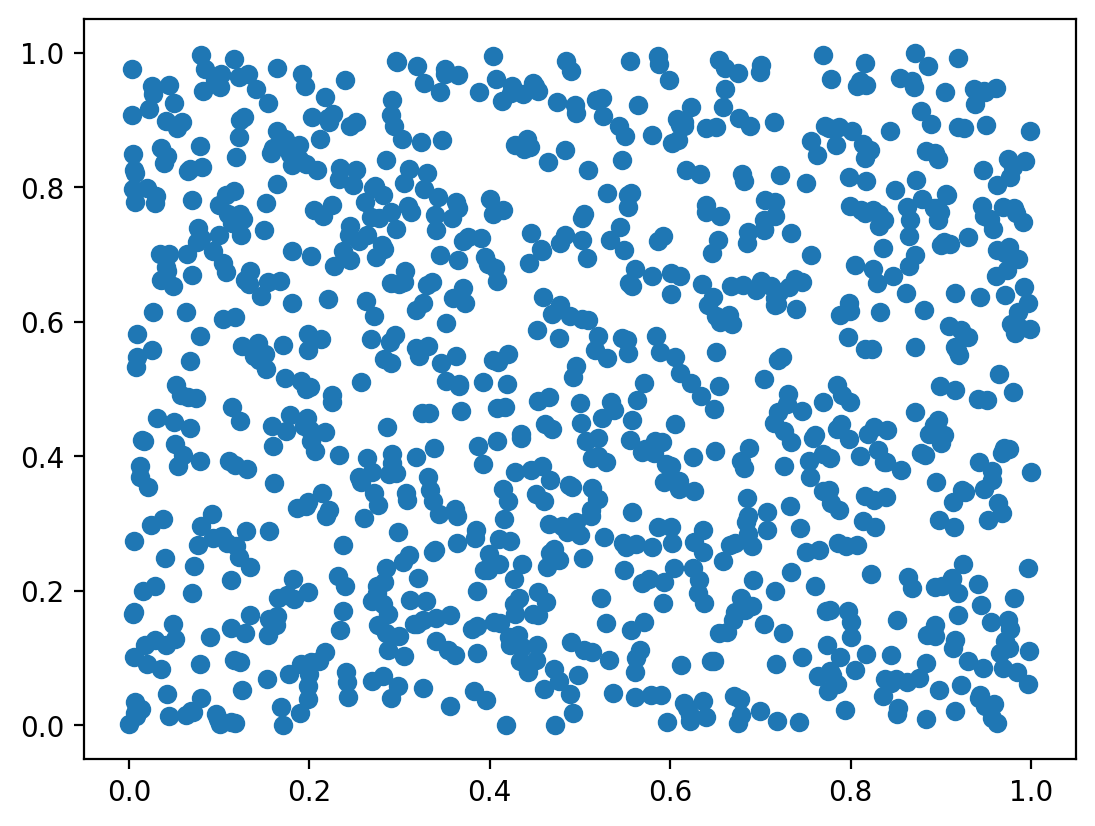

In [ ]:
x_uniform2d = torch.rand(1000, 2)
# satter plot
plt.scatter(x_uniform2d[:, 0], x_uniform2d[:, 1])

In [ ]:
# Check values of x_uniform2d < 0.5 and color them red
mask = x_uniform2d < 0.5
print(mask)

tensor([[False,  True],
        [False,  True],
        [ True, False],
        ...,
        [False, False],
        [ True,  True],
        [ True,  True]])


In [ ]:
# With missing values

# Randomly replace some entries with NaN

A = torch.randint(1, 6, (n_users, n_movies), dtype=torch.float)
A[torch.rand(A.shape) < 0.5] = float('nan')
A

tensor([[1., nan, 1., nan, nan, 4., 5., nan, 2., 1.],
        [nan, 1., 3., nan, 1., nan, 1., nan, 2., 5.],
        [nan, 1., 1., nan, nan, nan, nan, 1., 1., nan],
        [1., nan, 5., nan, nan, 5., nan, 5., 5., nan],
        [4., 1., nan, 5., nan, nan, 5., nan, 2., 5.],
        [3., nan, 1., nan, 1., nan, 3., 5., 4., nan],
        [4., 4., nan, nan, nan, 2., nan, 4., 3., nan],
        [4., 3., nan, 4., nan, 3., nan, nan, 4., nan],
        [nan, nan, nan, 4., nan, 5., nan, 3., nan, nan],
        [nan, nan, 1., nan, nan, nan, nan, nan, 2., nan],
        [nan, nan, 3., nan, 1., nan, nan, nan, nan, 4.],
        [1., 5., nan, nan, 4., nan, nan, nan, nan, nan],
        [3., 3., 2., nan, nan, 3., nan, nan, nan, nan],
        [nan, nan, 4., 1., nan, nan, 4., nan, 4., 2.],
        [nan, 5., 4., 5., 1., nan, 1., 2., nan, 2.],
        [2., nan, nan, 2., 4., 5., nan, nan, 5., nan],
        [nan, nan, nan, 1., nan, 3., 1., 3., nan, 4.],
        [4., 4., 5., nan, nan, 5., 3., 2., 2., nan],
       

In [ ]:
W, H, loss = factorize(A, 2, device=device)
loss

tensor(nan, grad_fn=<LinalgVectorNormBackward0>)

In [ ]:
A.shape

torch.Size([20, 10])

In [ ]:
mask = ~torch.isnan(A)
mask

tensor([[ True, False,  True, False, False,  True,  True, False,  True,  True],
        [False,  True,  True, False,  True, False,  True, False,  True,  True],
        [False,  True,  True, False, False, False, False,  True,  True, False],
        [ True, False,  True, False, False,  True, False,  True,  True, False],
        [ True,  True, False,  True, False, False,  True, False,  True,  True],
        [ True, False,  True, False,  True, False,  True,  True,  True, False],
        [ True,  True, False, False, False,  True, False,  True,  True, False],
        [ True,  True, False,  True, False,  True, False, False,  True, False],
        [False, False, False,  True, False,  True, False,  True, False, False],
        [False, False,  True, False, False, False, False, False,  True, False],
        [False, False,  True, False,  True, False, False, False, False,  True],
        [ True,  True, False, False,  True, False, False, False, False, False],
        [ True,  True,  True, False, Fal

In [ ]:
mask.sum()

tensor(95)

In [ ]:
W = torch.randn(A.shape[0], k, requires_grad=True, device=device)
H = torch.randn(k, A.shape[1],  requires_grad=True, device=device)

diff_matrix = torch.mm(W, H)-A.to(device)
diff_matrix.shape

torch.Size([20, 10])

In [ ]:
diff_matrix

tensor([[ -2.7184,      nan,  -6.4178,      nan,      nan,  -7.5363,  -8.5025,
              nan,   0.8986,  -2.8007],
        [     nan,  -9.9880,  -2.7874,      nan,  -1.2028,      nan,  -4.2039,
              nan,  -1.9644,  -8.3509],
        [     nan,   0.9819,  -3.0853,      nan,      nan,      nan,      nan,
          -0.3832,  -1.6977,      nan],
        [  0.6062,      nan,  -6.2226,      nan,      nan,  -5.9253,      nan,
          -9.5148,  -3.7073,      nan],
        [ -3.6471,  -3.3950,      nan,   3.5957,      nan,      nan,  -6.7301,
              nan,  -2.4058, -12.3278],
        [ -3.5913,      nan,   0.2545,      nan,   7.3452,      nan,  -2.4712,
           0.0610,  -6.0114,      nan],
        [ -5.6389,  -1.3777,      nan,      nan,      nan,  -1.0533,      nan,
          -1.4625,  -2.6009,      nan],
        [ -3.0380,  -8.7202,      nan,  -2.0173,      nan,  -3.6036,      nan,
              nan,  -2.4021,      nan],
        [     nan,      nan,      nan,  -7.6847,

In [ ]:
# Mask the matrix
diff_matrix[mask].shape

torch.Size([95])

In [ ]:
diff_matrix[mask]

tensor([ -2.7184,  -6.4178,  -7.5363,  -8.5025,   0.8986,  -2.8007,  -9.9880,
         -2.7874,  -1.2028,  -4.2039,  -1.9644,  -8.3509,   0.9819,  -3.0853,
         -0.3832,  -1.6977,   0.6062,  -6.2226,  -5.9253,  -9.5148,  -3.7073,
         -3.6471,  -3.3950,   3.5957,  -6.7301,  -2.4058, -12.3278,  -3.5913,
          0.2545,   7.3452,  -2.4712,   0.0610,  -6.0114,  -5.6389,  -1.3777,
         -1.0533,  -1.4625,  -2.6009,  -3.0380,  -8.7202,  -2.0173,  -3.6036,
         -2.4021,  -7.6847,  -9.6767,  -4.6798,  -2.2519,  -1.0559,  -2.0719,
         -1.3850,  -7.6902,  -2.0218,  -8.0938,  -7.1466,  -2.7258,   1.7713,
          1.6750,   0.3104,   0.6589,  -3.3431,  -1.1166,  -6.8870,  -0.6971,
         -4.2360,  -6.3416,  -9.4690,  -1.5629,   0.2199,   0.6023,   0.6338,
         -0.2554,  -1.4812,  -3.3129,  -6.4086,  -9.1100,   3.0428,   1.4741,
         -1.1544,  -7.3770, -11.3558,  -2.4728,  -2.0845,  -4.8993,  -5.1961,
         -1.8930, -10.0846,  -2.4374,  -1.3693,  -0.1126,  -1.52

In [ ]:
# Modify the loss function to ignore NaN values

def factorize(A, k, device=torch.device("cpu")):
    """Factorize the matrix D into A and B"""
    A = A.to(device)
    # Randomly initialize A and B
    W = torch.randn(A.shape[0], k, requires_grad=True, device=device)
    H = torch.randn(k, A.shape[1], requires_grad=True, device=device)
    # Optimizer
    optimizer = optim.Adam([W, H], lr=0.01)
    mask = ~torch.isnan(A)
    # Train the model
    for i in range(1000):
        # Compute the loss
        #diff_matrix = 5*torch.nn.Sigmoid()(torch.mm(W, H)) - A
        diff_matrix = torch.mm(W, H) - A
        diff_vector = diff_matrix[mask]
        loss = torch.norm(diff_vector)

        # Zero the gradients
        optimizer.zero_grad()

        # Backpropagate
        loss.backward()

        # Update the parameters
        optimizer.step()

    return W, H, loss

In [ ]:
W, H, loss = factorize(A, 5, device=device)
loss

tensor(0.1040, grad_fn=<LinalgVectorNormBackward0>)

In [ ]:
torch.mm(W, H)

tensor([[ 1.0016,  5.4369,  1.0040,  0.5521,  4.0372,  4.0015,  4.9993,  1.9831,
          2.0019,  1.0026],
        [ 4.7803,  0.9953,  3.0060,  4.7348,  1.0050,  0.9853,  1.0083,  3.0153,
          2.0000,  5.0081],
        [ 2.2588,  1.0000,  1.0003,  3.3130,  1.7085,  1.3148,  3.6993,  1.0009,
          1.0008,  3.0959],
        [ 1.0059,  9.7118,  5.0112, -0.0585,  1.7582,  5.0018, -3.6146,  5.0062,
          5.0065, -1.0999],
        [ 4.0039,  0.9939,  6.0125,  5.0085,  3.1352,  4.0392,  4.9845, -0.6865,
          2.0021,  5.0046],
        [ 2.9983,  5.7339,  0.9956,  7.9463,  0.9979,  1.8831,  2.9997,  4.9973,
          3.9977,  4.2505],
        [ 4.0013,  3.9951,  0.6082,  8.0563,  2.4053,  2.0062,  6.2858,  3.9971,
          2.9996,  5.7943],
        [ 4.0020,  3.0052,  8.7077,  4.0036, -0.5818,  2.9995, -5.2872,  2.2436,
          4.0040,  2.8491],
        [ 4.4392,  5.3555,  5.7550,  4.0045,  3.7556,  5.0011,  3.1785,  3.0027,
          3.7306,  4.2644],
        [ 0.2793,  

In [ ]:
df.values.shape

(83, 10)

In [ ]:
A = torch.tensor(df.values, dtype=torch.float)
W, H, loss = factorize(A, 100, device=device)
print(loss)
mat=torch.mm(W, H)
s=mat.size()
max=0
min=0
for k in range(s[0]):
  for j in range(s[1]):
    if (max<mat[k][j]):
      max=mat[k][j]
    if (min>mat[k][j]):
      min=mat[k][j]
print(max)
print(min)

tensor(0.6047, grad_fn=<LinalgVectorNormBackward0>)
tensor(20.8610, grad_fn=<SelectBackward0>)
tensor(-27.6809, grad_fn=<SelectBackward0>)


In [ ]:
# Dropdown menu for user and predict for all movies
from ipywidgets import interact, widgets

def predict_movie_ratings(user, df, W, H):
    idx = df.index.get_loc(user)
    user_ratings = df.iloc[idx]
    user_ratings = user_ratings.dropna()
    user_ratings = user_ratings.to_frame().T
    user_ratings = user_ratings.reindex(columns=df.columns, fill_value=float('nan'))
    user_ratings = user_ratings.to_numpy()
    # predicted_ratings = 5*torch.nn.Sigmoid()(torch.mm(W, H)).cpu().detach().numpy()
    predicted_ratings = (torch.mm(W, H)).cpu().detach().numpy()
    return pd.DataFrame({"Observed": user_ratings.flatten(), "Predicted": predicted_ratings[idx].flatten()}, index=df.columns)

In [ ]:
predict_movie_ratings('Ayush Shrivastava', df, W, H)

,Observed,Predicted
Sholay,4.0,3.990687
Swades (We The People),4.0,3.985121
The Matrix (I),5.0,5.017866
Interstellar,5.0,5.032083
Dangal,3.0,2.997752
Taare Zameen Par,4.0,4.013203
Shawshank Redemption,NaN,1.161877
The Dark Knight,NaN,3.155051
Notting Hill,NaN,9.638673
Uri: The Surgical Strike,4.0,3.984503


In [ ]:
interact(predict_movie_ratings, user=widgets.Dropdown(options=df.index, value=df.index[0], description='User'), df=widgets.fixed(df), W=widgets.fixed(W), H=widgets.fixed(H))

interactive(children=(Dropdown(description='User', options=('P.Sai Keerthana ', 'Pradeep ', 'Uday Sankar Gotti…

<function __main__.predict_movie_ratings(user, df, W, H)>

In [ ]:
# Image completion
import os
if os.path.exists('dog.jpg'):
    print('dog.jpg exists')
else:
    !wget https://segment-anything.com/assets/gallery/AdobeStock_94274587_welsh_corgi_pembroke_CD.jpg -O dog.jpg

dog.jpg exists


In [ ]:
# Read in a image from torchvision
import torchvision
img = torchvision.io.read_image("dog.jpg")
print(img.shape)

torch.Size([3, 1365, 2048])


In [ ]:
# Make grayscale
img = torch.tensor(img, dtype=torch.float)
img = img.mean(dim=0, keepdim=False)
print(img.shape)

torch.Size([1365, 2048])


<ipython-input-307-1bc2d42b11f4>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img = torch.tensor(img, dtype=torch.float)


In [ ]:
img.shape

torch.Size([1365, 2048])

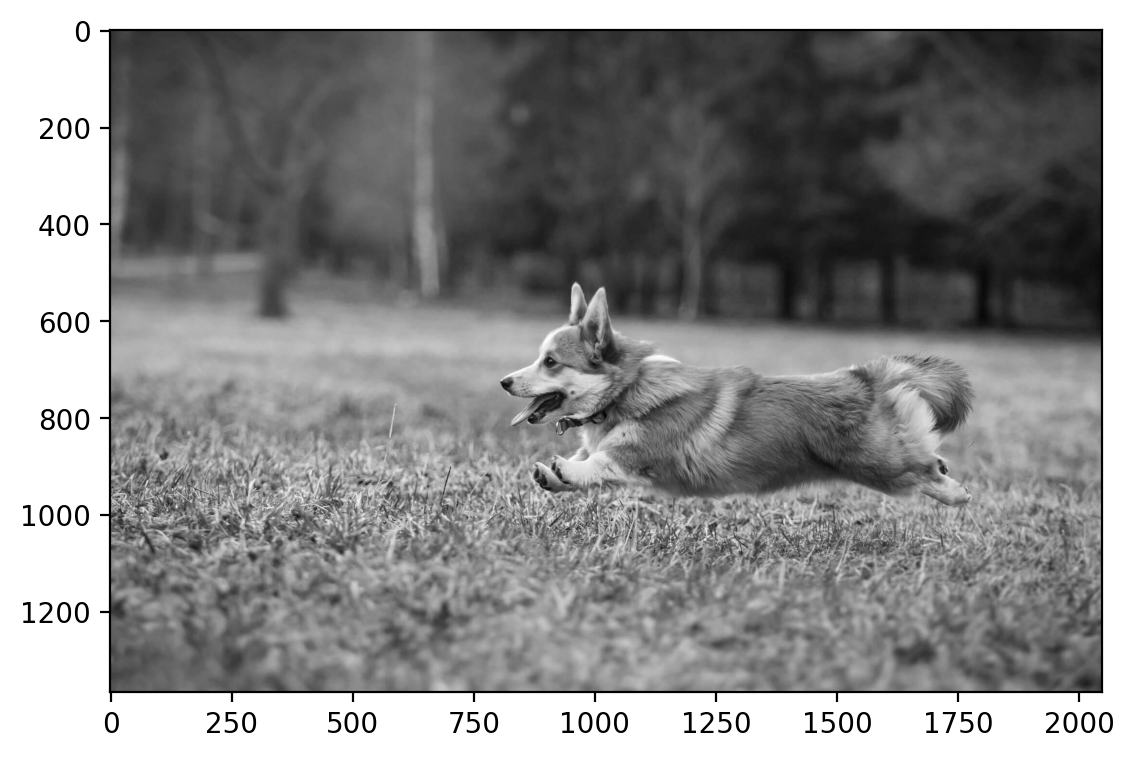

In [ ]:
plt.imshow(img, cmap='gray')

In [ ]:
crop = torchvision.transforms.functional.crop(img, 600, 800, 300, 300)
crop.shape

torch.Size([300, 300])

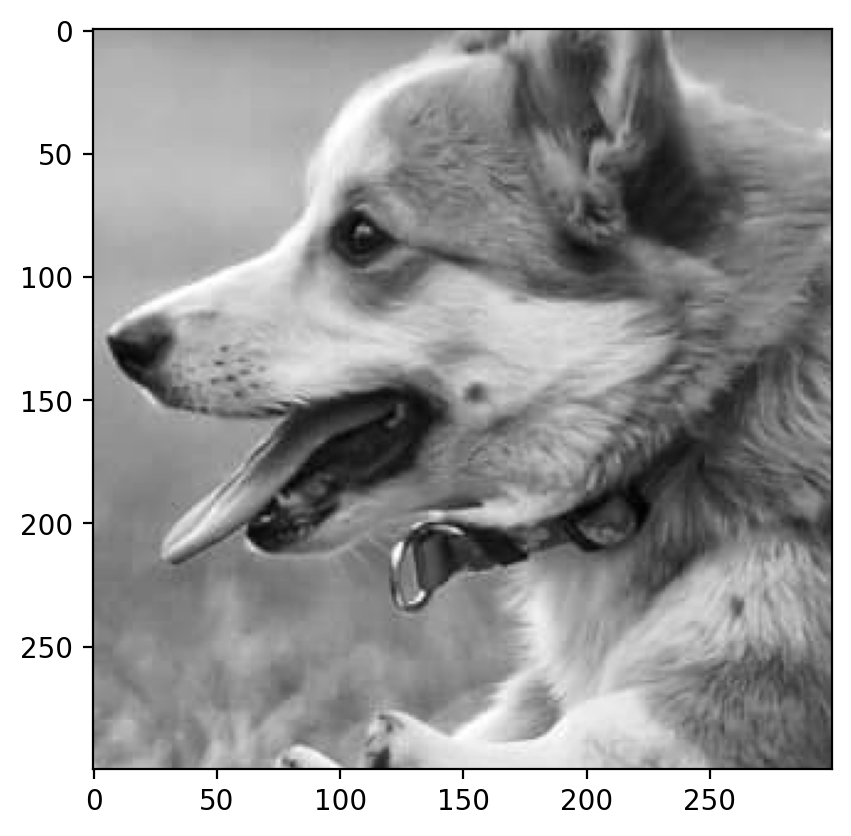

In [ ]:
plt.imshow(crop, cmap='gray')

In [ ]:
# Mask the image with NaN values
def mask_image(img, prop):
    img_copy = img.clone()
    mask = torch.rand(img.shape) < prop
    img_copy[mask] = float('nan')
    return img_copy, mask

In [ ]:
masked_img = mask_image(crop, 0.3)

In [ ]:
masked_img[1].sum()

tensor(27068)

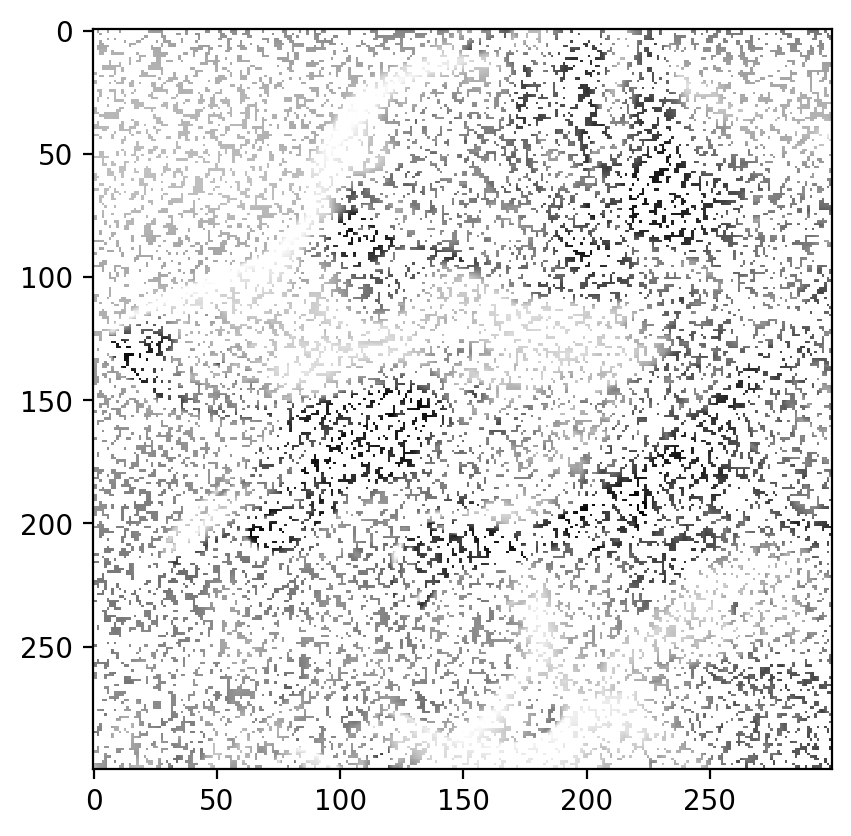

In [ ]:
plt.imshow(masked_img[0], cmap='gray')

In [ ]:
W, H, loss = factorize(masked_img[0], 50, device=device)

In [ ]:
loss

tensor(1348.1481, grad_fn=<LinalgVectorNormBackward0>)

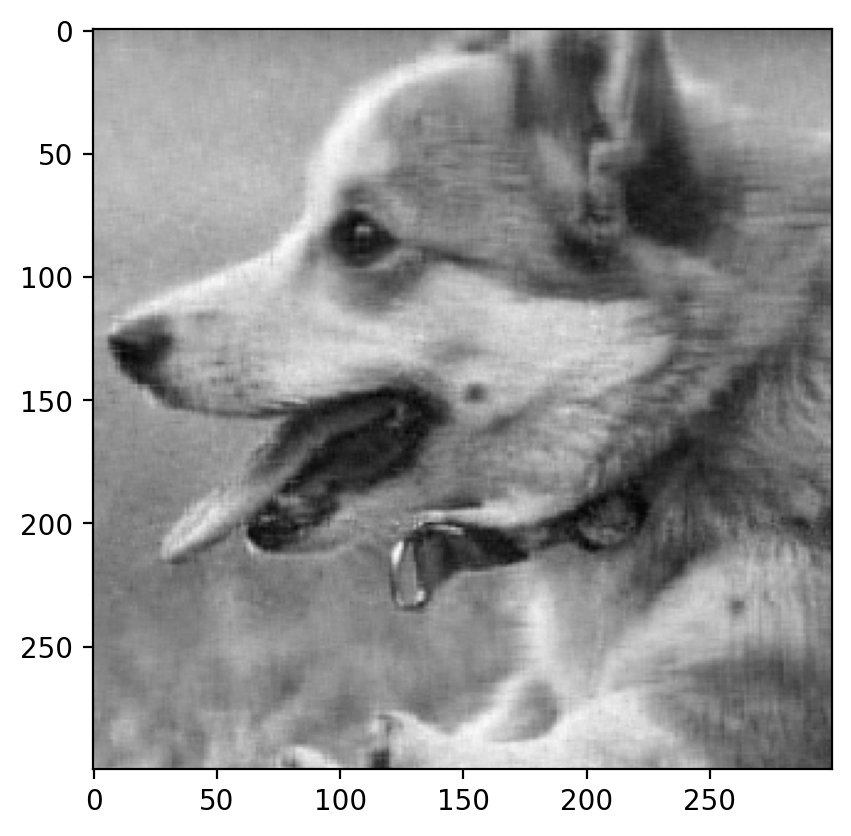

In [ ]:
plt.imshow(torch.mm(W, H).cpu().detach().numpy(), cmap='gray')

In [ ]:
def plot_image_completion(prop=0.1, factors=50):
    masked_img, mask = mask_image(crop, prop)
    W, H, loss = factorize(masked_img, factors, device=device)
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    reconstructed_img = torch.mm(W, H).cpu().detach().numpy()
    ax[0].imshow(masked_img, cmap='gray')
    ax[0].set_title("Masked image")
    ax[1].imshow(reconstructed_img, cmap='gray')
    ax[1].set_title("Reconstructed image")

interactive(children=(FloatSlider(value=0.3, description='prop', max=0.9, min=0.01, step=0.01), IntSlider(valu…

<function __main__.plot_image_completion(prop=0.1, factors=50)>

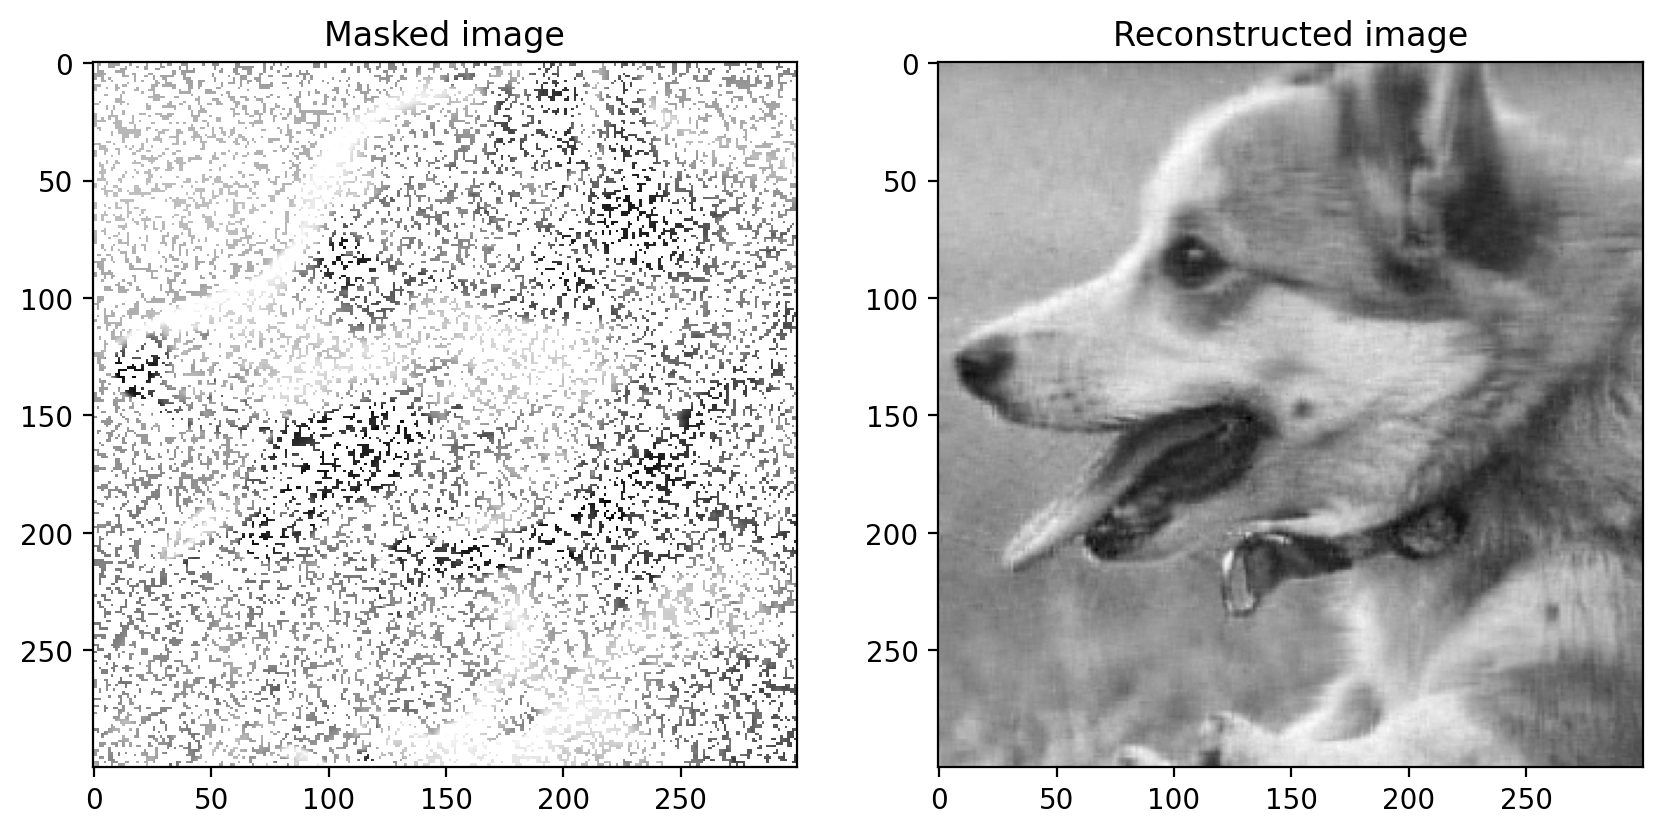

In [ ]:
interact(plot_image_completion, prop=widgets.FloatSlider(min=0.01, max=0.9, step=0.01, value=0.3), factors=widgets.IntSlider(min=1, max=150, step=1, value=50))

In [ ]:
# Now use matrix faactaorization to predict the ratings

import torch
import torch.nn as nn
import torch.nn.functional as F

# Create a class for the model

class MatrixFactorization(nn.Module):
    def __init__(self, n_users, n_movies, n_factors=20):
        super().__init__()
        self.user_factors = nn.Embedding(n_users, n_factors)
        self.movie_factors = nn.Embedding(n_movies, n_factors)

    def forward(self, user, movie):
        return (self.user_factors(user) * self.movie_factors(movie)).sum(1)